Задание 1


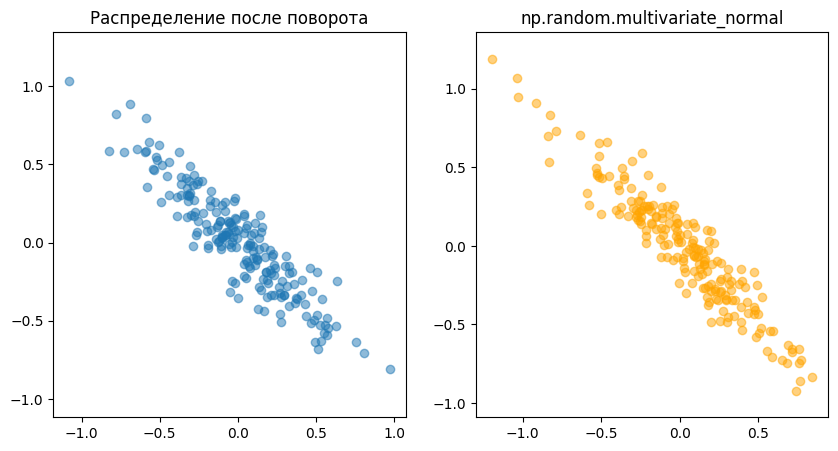

Ковариационная матрица (ручной способ):
 [[ 0.11269597 -0.10269117]
 [-0.10269117  0.11078473]]
Ковариационная матрица (через формулу):
 [[ 0.13 -0.12]
 [-0.12  0.13]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

M = 200
sigma1 = 0.1
sigma2 = 0.5
alpha = np.pi / 4

x1 = np.random.randn(M, 1) * sigma1
x2 = np.random.randn(M, 1) * sigma2
X = np.concatenate((x1, x2), axis=1)

R = np.array([[np.cos(alpha), -np.sin(alpha)],
              [np.sin(alpha),  np.cos(alpha)]])
X_rot = X @ R.T

cov_manual = np.cov(X_rot.T)

cov = R @ np.diag([sigma1**2, sigma2**2]) @ R.T
X_mv = np.random.multivariate_normal(mean=[0, 0], cov=cov, size=M)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X_rot[:,0], X_rot[:,1], alpha=0.5)
plt.title("Распределение после поворота")
plt.axis("equal")

plt.subplot(1,2,2)
plt.scatter(X_mv[:,0], X_mv[:,1], alpha=0.5, color="orange")
plt.title("np.random.multivariate_normal")
plt.axis("equal")

plt.show()

print("Ковариационная матрица (ручной способ):\n", cov_manual)
print("Ковариационная матрица (через формулу):\n", cov)


Задание 2

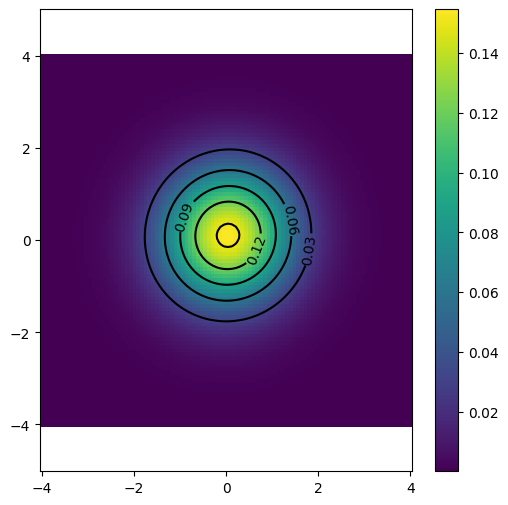

Среднее значение: [0.04241625 0.10637132]
Ковариационная матрица:
 [[0.99683263 0.02266265]
 [0.02266265 1.06260298]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

M = 200
X = np.random.randn(M, 2)

mean = np.mean(X, axis=0)
cov = np.cov(X.T)

xx = np.linspace(-4, 4, 100)
yy = np.linspace(-4, 4, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)

m = multivariate_normal(mean=mean, cov=cov)
ZZ = m.pdf(pp).reshape(XX.shape)

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c='red', alpha=0.5)
IMG = plt.pcolor(XX, YY, ZZ, shading='auto')
plt.colorbar(IMG)
CS = plt.contour(XX, YY, ZZ, levels=5, colors='k')
plt.clabel(CS, inline=1, fontsize=10)
plt.axis("equal")
plt.show()

print("Среднее значение:", mean)
print("Ковариационная матрица:\n", cov)


Задание 3


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


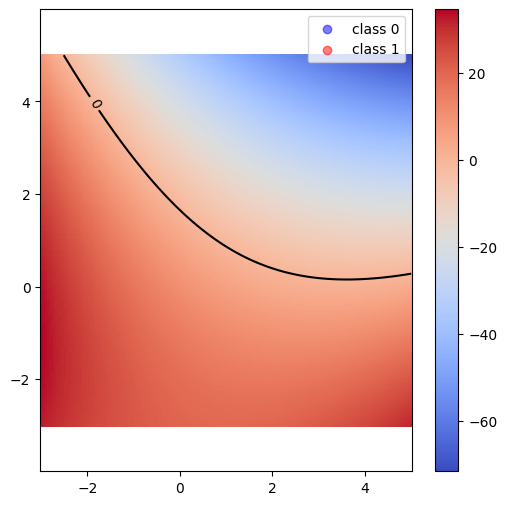

Среднее класса 0: [-0.05092442  0.00666975]
Ковариация класса 0:
 [[ 0.49827669 -0.0135342 ]
 [-0.0135342   0.19245765]]
Среднее класса 1: [2.08902866 2.00708625]
Ковариация класса 1:
 [[0.30960319 0.08800825]
 [0.08800825 0.28787618]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

np.random.seed(0)
M = 200
X0 = np.random.multivariate_normal([0,0], [[0.5,0],[0,0.2]], M)
X1 = np.random.multivariate_normal([2,2], [[0.3,0.1],[0.1,0.3]], M)

mean0 = np.mean(X0, axis=0)
cov0 = np.cov(X0.T)
mean1 = np.mean(X1, axis=0)
cov1 = np.cov(X1.T)

prior0 = len(X0) / (len(X0)+len(X1))
prior1 = len(X1) / (len(X0)+len(X1))

xx = np.linspace(-3,5,200)
yy = np.linspace(-3,5,200)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)

m0 = multivariate_normal(mean0, cov0)
m1 = multivariate_normal(mean1, cov1)

Z = np.log(m0.pdf(pp)*prior0) - np.log(m1.pdf(pp)*prior1)
Z = Z.reshape(XX.shape)

plt.figure(figsize=(6,6))
plt.scatter(X0[:,0], X0[:,1], c='blue', alpha=0.5, label='class 0')
plt.scatter(X1[:,0], X1[:,1], c='red', alpha=0.5, label='class 1')
IMG = plt.pcolor(XX, YY, Z, cmap='coolwarm', shading='auto')
plt.colorbar(IMG)
CS = plt.contour(XX, YY, Z, levels=[0], colors='k')
plt.clabel(CS, inline=1, fontsize=10)
plt.legend()
plt.axis("equal")
plt.show()

print("Среднее класса 0:", mean0)
print("Ковариация класса 0:\n", cov0)
print("Среднее класса 1:", mean1)
print("Ковариация класса 1:\n", cov1)


Задание 4

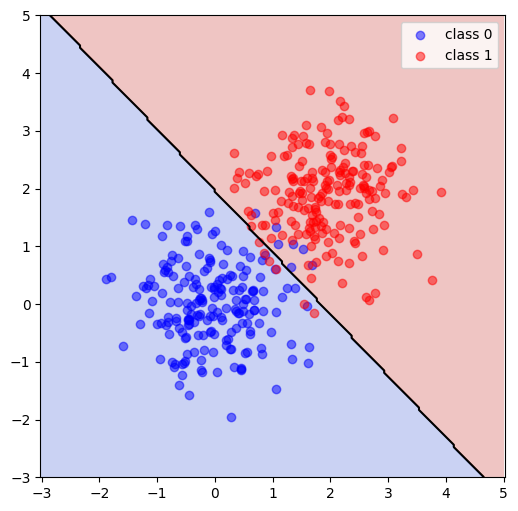

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator

np.random.seed(0)
M = 200
X0 = np.random.multivariate_normal([0,0], [[0.5,0],[0,0.5]], M)
X1 = np.random.multivariate_normal([2,2], [[0.5,0],[0,0.5]], M)
X = np.vstack((X0, X1))
y = np.array([0]*M + [1]*M)

class myLDA(BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.means_ = np.array([X[y==c].mean(axis=0) for c in self.classes_])
        self.cov_ = np.cov(X.T)
        self.inv_cov_ = np.linalg.inv(self.cov_)
        self.priors_ = np.array([np.mean(y==c) for c in self.classes_])
        return self

    def predict(self, X):
        scores = []
        for i, c in enumerate(self.classes_):
            diff = X - self.means_[i]
            score = -0.5 * np.sum(diff @ self.inv_cov_ * diff, axis=1) + np.log(self.priors_[i])
            scores.append(score)
        return np.argmax(scores, axis=0)

lda = myLDA()
lda.fit(X, y)
xx, yy = np.meshgrid(np.linspace(-3,5,200), np.linspace(-3,5,200))
grid = np.stack((xx.flatten(), yy.flatten()), axis=1)
Z = lda.predict(grid).reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X0[:,0], X0[:,1], c='blue', alpha=0.5, label='class 0')
plt.scatter(X1[:,0], X1[:,1], c='red', alpha=0.5, label='class 1')
plt.contour(xx, yy, Z, levels=[0.5], colors='k')
plt.legend()
plt.axis("equal")
plt.show()


Задание 5

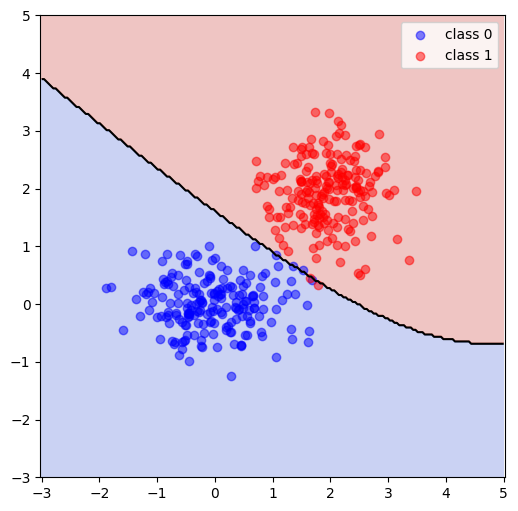

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator

np.random.seed(0)
M = 200
X0 = np.random.multivariate_normal([0,0], [[0.5,0],[0,0.2]], M)
X1 = np.random.multivariate_normal([2,2], [[0.3,0],[0,0.3]], M)
X = np.vstack((X0, X1))
y = np.array([0]*M + [1]*M)

class myNB(BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.means_ = np.array([X[y==c].mean(axis=0) for c in self.classes_])
        self.vars_ = np.array([X[y==c].var(axis=0) for c in self.classes_])
        self.priors_ = np.array([np.mean(y==c) for c in self.classes_])
        return self

    def predict(self, X):
        scores = []
        for i, c in enumerate(self.classes_):
            mean = self.means_[i]
            var = self.vars_[i]
            log_prob = -0.5 * np.sum(np.log(2*np.pi*var) + ((X - mean)**2)/var, axis=1) + np.log(self.priors_[i])
            scores.append(log_prob)
        return np.argmax(scores, axis=0)

nb = myNB()
nb.fit(X, y)

import matplotlib.pyplot as plt
xx, yy = np.meshgrid(np.linspace(-3,5,200), np.linspace(-3,5,200))
grid = np.stack((xx.flatten(), yy.flatten()), axis=1)
Z = nb.predict(grid).reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X0[:,0], X0[:,1], c='blue', alpha=0.5, label='class 0')
plt.scatter(X1[:,0], X1[:,1], c='red', alpha=0.5, label='class 1')
plt.contour(xx, yy, Z, levels=[0.5], colors='k')
plt.legend()
plt.axis("equal")
plt.show()


Задание 6

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

X, y = make_classification(n_samples=500, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#  LDA
class myLDA(BaseEstimator):
    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.means_ = np.array([X[y==c].mean(axis=0) for c in self.classes_])
        self.cov_ = np.cov(X.T)
        self.inv_cov_ = np.linalg.inv(self.cov_)
        self.priors_ = np.array([np.mean(y==c) for c in self.classes_])
        return self
    def predict(self, X):
        scores = []
        for i, c in enumerate(self.classes_):
            diff = X - self.means_[i]
            score = -0.5 * np.sum(diff @ self.inv_cov_ * diff, axis=1) + np.log(self.priors_[i])
            scores.append(score)
        return np.argmax(scores, axis=0)

#Naive Bayes
class myNB(BaseEstimator):
    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.means_ = np.array([X[y==c].mean(axis=0) for c in self.classes_])
        self.vars_ = np.array([X[y==c].var(axis=0) for c in self.classes_])
        self.priors_ = np.array([np.mean(y==c) for c in self.classes_])
        return self
    def predict(self, X):
        scores = []
        for i, c in enumerate(self.classes_):
            mean = self.means_[i]
            var = self.vars_[i]
            log_prob = -0.5 * np.sum(np.log(2*np.pi*var) + ((X - mean)**2)/var, axis=1) + np.log(self.priors_[i])
            scores.append(log_prob)
        return np.argmax(scores, axis=0)

lda = myLDA().fit(X_train, y_train)
nb = myNB().fit(X_train, y_train)

y_pred_lda = lda.predict(X_test)
y_pred_nb = nb.predict(X_test)

def print_metrics(y_true, y_pred, name):
    print(f"Метрики для {name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print()

print_metrics(y_test, y_pred_lda, "LDA")
print_metrics(y_test, y_pred_nb, "Naive Bayes")


Метрики для LDA:
Accuracy: 0.86
Precision: 0.9117647058823529
Recall: 0.8051948051948052

Метрики для Naive Bayes:
Accuracy: 0.8266666666666667
Precision: 0.8148148148148148
Recall: 0.8571428571428571

